In [59]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(55)

Генерація двовимірних даних та значення х

In [60]:
kilkist_tochok = 100
spravzhniy_nakhyl = -0.8
spravzhniy_vilnyy_chlen = 15.0
dani_x = np.linspace(0, 20, kilkist_tochok)
shum = np.random.normal(0, 4, kilkist_tochok)
dani_y = spravzhniy_nakhyl * dani_x + spravzhniy_vilnyy_chlen + shum

Реалізація МНК (метод найменших квадратів) та порівняння з np.polyfit

In [61]:
serednie_x = np.mean(dani_x)
serednie_y = np.mean(dani_y)

znamennik = np.sum((dani_x - serednie_x)**2)
if znamennik == 0:
    otsinka_k_ruchna = np.nan
    otsinka_b_ruchna = np.nan
    print("Помилка: всі значення x однакові.")
else:
    otsinka_k_ruchna = np.sum((dani_x - serednie_x) * (dani_y - serednie_y)) / znamennik
    otsinka_b_ruchna = serednie_y - otsinka_k_ruchna * serednie_x
    
otsinka_k_polyfit, otsinka_b_polyfit = np.polyfit(dani_x, dani_y, 1)
print(f"Власний МНК: k = {otsinka_k_ruchna:.4f}, b = {otsinka_b_ruchna:.4f}")
print(f"numpy.polyfit:           k = {otsinka_k_polyfit:.4f}, b = {otsinka_b_polyfit:.4f}")
print(f"Справжні параметри:      k = {spravzhniy_nakhyl:.4f}, b = {spravzhniy_vilnyy_chlen:.4f}")

Власний МНК: k = -0.8009, b = 15.0755
numpy.polyfit:           k = -0.8009, b = 15.0755
Справжні параметри:      k = -0.8000, b = 15.0000


Візуалізація результатів МНК та np.polyfit

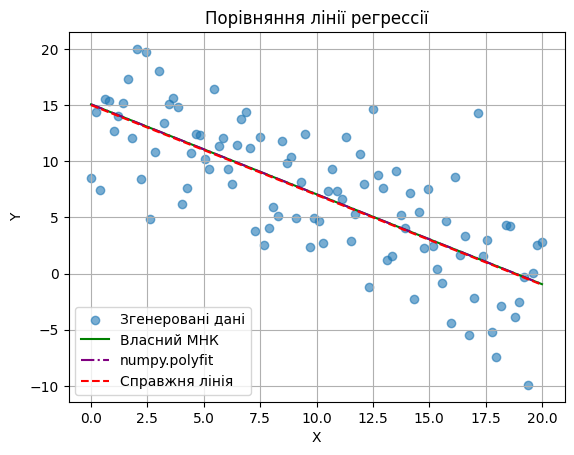

In [62]:
plt.figure()
plt.scatter(dani_x, dani_y, label='Згенеровані дані', alpha=0.6)

liniya_diapazon_x = np.array([np.min(dani_x), np.max(dani_x)])
if not np.isnan(otsinka_k_ruchna) and not np.isnan(otsinka_b_ruchna):
     plt.plot(liniya_diapazon_x, otsinka_k_ruchna * liniya_diapazon_x + otsinka_b_ruchna, label='Власний МНК', color='green', linestyle='-')
     

plt.plot(liniya_diapazon_x, otsinka_k_polyfit * liniya_diapazon_x + otsinka_b_polyfit, label='numpy.polyfit', color='purple', linestyle='-.')
plt.plot(liniya_diapazon_x, spravzhniy_nakhyl * liniya_diapazon_x + spravzhniy_vilnyy_chlen, label='Справжня лінія', color='red', linestyle='--')
plt.title('Порівняння лінії регрессії')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

Реалізація градієнтного спуску

In [63]:
def gradient_descent(dani_x, dani_y, learning_rate=0.01, kilkist_iteratsii=1000):
    kilkist_danykh = len(dani_x)
    optymalnyi_koefitsient_nakhylu = 0
    optymalnyi_vilnyi_chlen = 0
    errors = []
    
    for i in range(kilkist_iteratsii):
        y_prognoz = optymalnyi_koefitsient_nakhylu * dani_x + optymalnyi_vilnyi_chlen
        zmina_koefitsient_nakhylu = -(2/kilkist_danykh) * sum(dani_x * (dani_y - y_prognoz))
        zmina_vilnyi_chlen = -(2/kilkist_danykh) * sum(dani_y - y_prognoz)
        optymalnyi_koefitsient_nakhylu = optymalnyi_koefitsient_nakhylu - learning_rate * zmina_koefitsient_nakhylu
        optymalnyi_vilnyi_chlen = optymalnyi_vilnyi_chlen - learning_rate * zmina_vilnyi_chlen
        errors.append(np.mean((y_prognoz - dani_y)**2))
    
    return optymalnyi_koefitsient_nakhylu, optymalnyi_vilnyi_chlen, errors

Градієнтний спуск: k = -0.122, b = 5.991


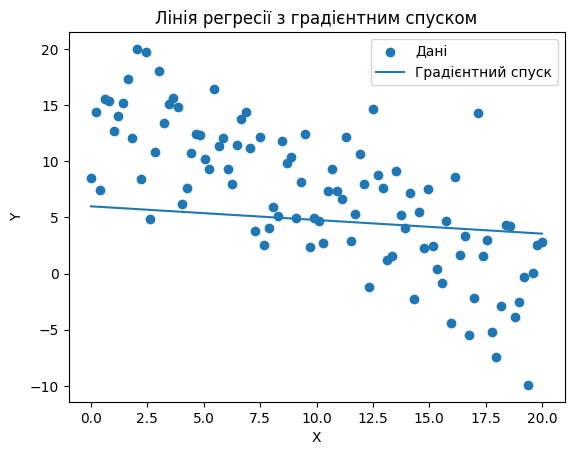

In [64]:
learning_rate = 0.001
kilkist_iteratsii = 1000
k_gd, b_gd, mse_history = gradient_descent(dani_x, dani_y, learning_rate, kilkist_iteratsii)
print(f"Градієнтний спуск: k = {k_gd:.3f}, b = {b_gd:.3f}")
plt.figure()
plt.scatter(dani_x, dani_y, label='Дані')
plt.plot(dani_x, k_gd * dani_x + b_gd, label='Градієнтний спуск')
plt.title("Лінія регресії з градієнтним спуском")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

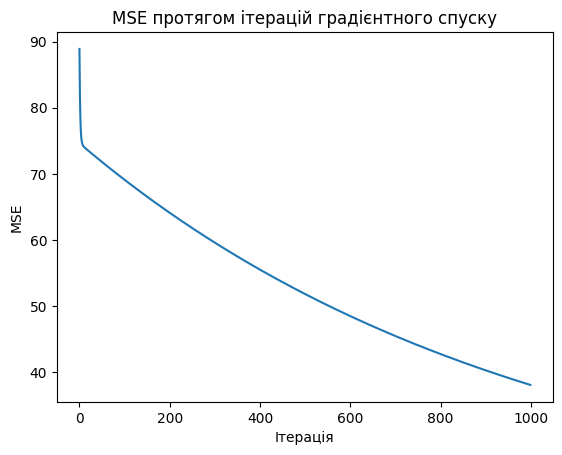

In [65]:
plt.figure()
plt.plot(range(kilkist_iteratsii), mse_history)
plt.title("MSE протягом ітерацій градієнтного спуску")
plt.xlabel("Ітерація")
plt.ylabel("MSE")
plt.show()